# Lab 4 - Polynomial and Multiple Regression

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

In [66]:
df =pd.read_csv('yield_data.csv')
df

,Temperature,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [67]:
x = df['Temperature'].values
y = df['Yield'].values

x = np.array(x)
y = np.array(y)

x_mean = x.mean()
y_mean = y.mean()

print(x_mean)
print()
print(y_mean)

78.0

2.833333333333333


In [68]:
b1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((-x_mean)**2)
b0 = y_mean - b1 * x_mean

print(f'B1: {b1}')
print(f'B0: {b0}')
print()

y_pred = b0 + b1*x
rmse = np.sqrt(np.mean((y-y_pred)**2))
mse = np.mean(((y-y_pred)**2))

print (f'RMSE: {rmse}')
print (f'MSE: {mse}')

B1: 0.004930966469428009
B0: 2.4487179487179485

RMSE: 0.3656438536609179
MSE: 0.13369542772000673


In [69]:
X_poly = np.vstack((x**2, x, np.ones_like(x))).T
coefficients, residuals, rank, s = np.linalg.lstsq(X_poly, y, rcond=None)
b2, b1, b0 = coefficients

y_pred_poly = b0 + b1 * x + b2 * x**2

rmse = np.sqrt(np.mean((y - y_pred_poly) ** 2))
mse = np.mean((y - y_pred_poly) ** 2)

print(f'B0: {b0}')
print(f'B1: {b1*10}')
print(f'B2: {b2*1000}')
print()
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

B0: 7.9604810996563575
B1: -1.537113402061856
B2: 1.075601374570447

RMSE: 0.2185970050801508
MSE: 0.04778465063001148


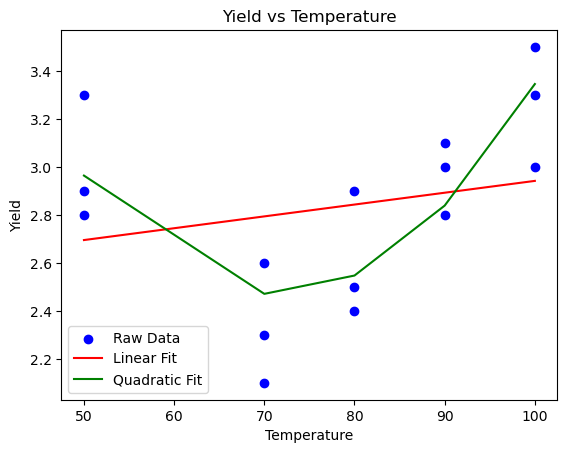

In [76]:
plt.scatter(x, y, color='blue', label='Raw Data')

plt.plot(x, y_pred, color='red', label='Linear Fit')

plt.plot(x, y_pred_poly, color='green', label='Quadratic Fit')

plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Yield vs Temperature')
plt.legend()
plt.show()

## Question 2

In [81]:
df =pd.read_csv('sample.csv')
df

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


Fitted Multiple Linear Regression Equation: y = -0.13 + 0.61*Area + -0.24*X2 + -0.07*X3
MSE: 0.0170
RMSE: 0.1305


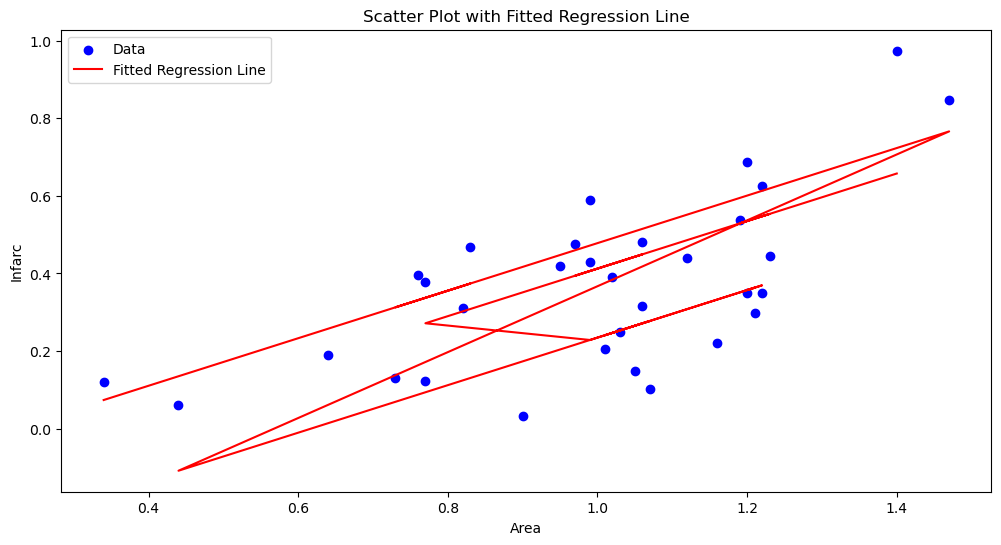

In [93]:
data = pd.read_csv('sample.csv')

x1 = data['Area'].values
x2 = data['X2'].values
x3 = data['X3'].values
y = data['Infarc'].values

X = np.vstack([np.ones(len(x1)), x1, x2, x3]).T

def fit_regression(X, y):
    XtX = np.dot(X.T, X)
    XtX_inv = np.linalg.inv(XtX)
    XtY = np.dot(X.T, y)
    beta = np.dot(XtX_inv, XtY)
    return beta

beta = fit_regression(X, y)
intercept, b1, b2, b3 = beta

print(f"Fitted Multiple Linear Regression Equation: y = {intercept:.2f} + {b1:.2f}*Area + {b2:.2f}*X2 + {b3:.2f}*X3")

y_pred = np.dot(X, beta)

def compute_metrics(y, y_pred):
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    return mse, rmse

mse, rmse = compute_metrics(y, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(12, 6))
plt.scatter(x1, y, color='blue', label='Data')
plt.plot(x1, y_pred, color='red', label='Fitted Regression Line')
plt.title('Scatter Plot with Fitted Regression Line')
plt.xlabel('Area')
plt.ylabel('Infarc')
plt.legend()
plt.show()